<a href="https://colab.research.google.com/github/ShenshunYao/NLP-Course-in-McGill/blob/master/NL2DS_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Shenshun Yao 260709204

In this assignment we will work with several real psycholinguistics datasets. These datasets are inspired by discussion in this [book](https://osf.io/pnumg/) by McGill Linguistics Professor Morgan Sondregger. 

The first part of the problem set will examine some lexical decision data. You can read about lexical decision experiments in the wikipedia article [here](https://en.wikipedia.org/wiki/Lexical_decision_task). (The first dataset also contains so-called *speeded naming* data. You can read about that in the speeded naming section of the first paper.)

The collection of the lexical decision data is originally described in. 

Balota, D. A., Cortese, M. J., Sergent-Marshall, S. D., Spieler, D. H., and Yap, M. J. (2004). [Visual word recognition of single-syllable words](https://drive.google.com/file/d/1TkFrg1jg0AK-9ZnKU5YXNVubdVUeNXbL/view?usp=sharing/). Journal of Experimental Psychology: General, 133(2):283–316.

In the following paper, this data was reanalyzed using some new features (predictors).

R. H. Baayen, L. Feldman, and R. Schreuder. [Morphological Influences on the Recognition of Monosyllabic Monomorphemic Words](https://drive.google.com/file/d/1USv3o6PXzocFtSggbcFn2fxYYrJ-pBcI/view?usp=sharing). Journal of Memory and Language, 53:496– 512, 2006. You can find a copy of this paper.

This data is discussed in Harald Baayen's book on linguistic data analysis.

Baayen, R. H. (2008). [Analyzing Linguistic Data: A practical introduction to statistics](https://drive.google.com/file/d/1RnQLXbzMARsEm8s8PFTYiSlaMc-vZ8Xa/view?usp=sharing). Cambridge University Press.

This particular file  was derived from the original data available as as the `english` dataframe of the [languageR package](https://cran.r-project.org/web/packages/languageR/index.html/).

Copy the data to your drive folder from: https://drive.google.com/file/d/19ybVdUWwZh_hSw69DRG7rYJd8o5dKWFK/view?usp=sharing.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/My Drive/english.csv"


Mounted at /content/drive/
'/content/drive/My Drive/english.csv'


Use [Pandas](https://pandas.pydata.org/docs/user_guide/index.html) to read the CSV file into a dataframe and then have a look at the data set.

In [2]:
#Problem 1: Put your answer here
import pandas as pd
english = pd.read_csv ('/content/drive/My Drive/english.csv')
print(english.info())
english.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4566 entries, 0 to 4565
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   RTlexdec                         4566 non-null   float64
 1   RTnaming                         4566 non-null   float64
 2   Familiarity                      4566 non-null   float64
 3   Word                             4566 non-null   object 
 4   AgeSubject                       4566 non-null   object 
 5   WordCategory                     4566 non-null   object 
 6   WrittenFrequency                 4566 non-null   float64
 7   WrittenSpokenFrequencyRatio      4566 non-null   float64
 8   FamilySize                       4566 non-null   float64
 9   DerivationalEntropy              4566 non-null   float64
 10  InflectionalEntropy              4566 non-null   float64
 11  NumberSimplexSynsets             4566 non-null   float64
 12  NumberComplexSynsets

,RTlexdec,RTnaming,Familiarity,Word,AgeSubject,WordCategory,WrittenFrequency,WrittenSpokenFrequencyRatio,FamilySize,DerivationalEntropy,InflectionalEntropy,NumberSimplexSynsets,NumberComplexSynsets,LengthInLetters,Ncount,MeanBigramFrequency,FrequencyInitialDiphone,ConspelV,ConspelN,ConphonV,ConphonN,ConfriendsV,ConfriendsN,ConffV,ConffN,ConfbV,ConfbN,NounFrequency,VerbFrequency,CV,Obstruent,Frication,Voice,FrequencyInitialDiphoneWord,FrequencyInitialDiphoneSyllable,CorrectLexdec
0,6.543754,6.145044,2.37,doe,young,N,3.912023,1.021651,1.386294,0.14144,0.02114,0.693147,0.000000,3,8,7.036333,12.02268,10,3.737670,41,8.837826,8,3.295837,0.693147,2.708050,3.496508,8.833900,49,0,C,obst,burst,voiced,10.129308,10.409763,27
1,6.304942,6.143756,5.60,stress,young,N,6.505784,2.089356,1.609438,0.06197,1.44339,2.484907,1.945910,6,0,9.883931,13.30069,10,6.693324,13,7.040536,10,6.693324,0.000000,0.000000,1.386294,5.817111,565,473,C,obst,frication,voiceless,12.422026,13.127395,30
2,6.424221,6.131878,3.87,pork,young,N,5.017280,-0.526334,1.945910,0.43035,0.00000,1.098612,2.639057,4,8,8.309180,12.07807,5,6.677083,6,3.828641,4,3.526361,0.693147,6.634633,1.098612,2.564949,150,0,C,obst,burst,voiceless,10.048151,11.003649,30
3,6.450597,6.198479,3.93,plug,young,N,4.890349,-1.044545,2.197225,0.35920,1.75393,2.484907,2.484907,4,3,7.943717,11.92678,17,4.762174,17,4.762174,17,4.762174,0.000000,0.000000,0.000000,0.000000,170,120,C,obst,burst,voiceless,11.796336,12.163092,26
4,6.531970,6.167726,3.27,prop,young,N,4.770685,0.924801,1.386294,0.06268,1.74730,1.609438,1.386294,4,9,8.349620,12.19724,19,6.234411,21,6.249975,19,6.234411,0.000000,0.000000,1.098612,2.197225,125,280,C,obst,burst,voiceless,11.991567,12.436772,28


Your first job is to familiarize yourself with the dataset by briefly examining the two papers above. First, read the wikipedia article on lexical decision, and briefly (2-4 sentences) explain the lexical decision experimental task.

**Q1: put your answer here (please keep it brief, 2-4 sentences)**


---


*The lexical decision task (LDT) is a procedure used in many psychology and psycholinguistics experiments. The basic procedure involves measuring how quickly people classify stimuli as words or non-words; the participant needs to decide about whether combinations of letters are words or nonwords.*


---


Start with the earlier paper then move on to the later paper. Note these two papers are long and use a lot of technical jargon from the field of psycholinguistics. *Reading each paper carefully would take several hours and you probably would not be able to understand everything unless you have previous familiarity with experimental psychology.*  This is not the goal of this part of the assignment. Instead, the goal is to just familiarize yourself as efficiently as possible with what some of the columns in the data set mean. An important skill in data science is quickly evaluating the high level idea and questions studied in a paper and finding the places where quantitites are defined, without doing a careful reading.

A good way to approach this is to first read the abstract, the introduction and the conclusion and then have a look at the figures, always keeping in mind the data from the CSV above and trying to find interpretations for the various columns. Don't get stuck on stuff you don't understand unless you are pretty sure you need to understand it to answer the question.

Focus on figuring out where you can find the relevant information to answer the following questions. 

***Question 2:*** In these studies and in this dataset various regression models are used to analyze the experimental data. What was measured in these studies that corresponds to $\mathbf{y}$ in our notation from class (i.e., the quantities to be predicted) and which columns in the dataset have these values? 

**Q2: put your answer here (please keep it brief, 2-4 sentences)**



---


*The relevant variables to be predicted are lexical decision times which re in variable RTlexdec and speeded naming times which are in variable RTnaming*



---



***Question 3:*** In both papers a number of different quantities are used as predictors for the experimental measures. These correspond to the columns of our $\mathbf{X}$ matrix from class. Note that between these two papers there are a lot of variables, and this a lot of columns in the table. Please determine the meaning of the first seven features from these papers (`Familiarity` to `FamilySize`).

**Q3: put your answer here (please keep it brief, 1-2 sentences/predictor)**


---
`Familiarity`: Subjective frequency norms, which are based on participants' subjective ratings of how frequently they have encountered a word in their lifetime

`Word`: What the word is.

`AgeSubject`: Two subject groups differentiated by age, young and old.

`WrittenSpokenFrequencyRatio`: The ratio of the frequency of this word used in written English to the frequency of the word used in spoken English.

`FamilySize`: The number of complex words in which the word occurs as a constituent.

`WrittenFrequency`: The frequency of use in written English, i.e. how frequent people used when writing English texts. In the second paper, the arthors use surface frequency count (using CELEX),which cumulate over all forms (of any word category) that were identical to the form as listed in the Balota
database, and then enter log frequency into the model.


`WordCategory`: Two category for words, nouns and verbs

---
***Question 4:*** For each of these predictors, how would you intuitively expect it to relate to the reactions times in the $\mathbf{y}$ variables? (Note that there is no right or wrong answer here, so long as you give a justification for your reasoning). Please be brief, no more than 2-4 sentences per predictor.

**Q4: put your answer here (please keep it brief, 1-2 sentences/predictor)**


---

`Familiarity`: I think it is negatively related to reaction times in the lexical decision and word naming tasks since if one is familiar with some word, it is obvious that when doing lexical decision or word naming task, he can recognize that word  in a short time.

`Word`: Different words induces different reaction times in the lexical decision and word naming tasks.

`AgeSubject`: In general, I think the young may react quicker than the old. Because as people age, loss of brain Connections may slow the reaction time. Moreover, as people age, they may forget some words (age-related memory loss).

`WordCategory`: From my experience, I use nouns more often than verbs in daliy life. Therefore, participants may spend less time classifying or naming a noun.

`WrittenFrequency`: I think written frequency is negatively related to the reactions times in the lexical decision and word naming tasks. Because if one word is frequently written in books, newpapers or somewhere else, people can often see that word and then they can quickly react to that word.

`WrittenSpokenFrequencyRatio`: One word with lower written-spoken frequency ratio indicates that it has rather higher spoken frequency, which implies people may be exposed to this word frequently in daily life. Therefore, they can easily think it is a existing word.

`FamilySize`: Words and pseudowords with
large morphological families are very word-like. Therefore, participants tend to recognize this kind of words or pseudowords as existing words.

---


Let's simplify the dataset a bit, to have fewer columns. 

In [3]:
# Problem 2: Write some code that drops all of the columns from the 
# English dataset past the 9th column (the last column should be FamilySize)
english = english.iloc[:,0:9]
english.head()

,RTlexdec,RTnaming,Familiarity,Word,AgeSubject,WordCategory,WrittenFrequency,WrittenSpokenFrequencyRatio,FamilySize
0,6.543754,6.145044,2.37,doe,young,N,3.912023,1.021651,1.386294
1,6.304942,6.143756,5.60,stress,young,N,6.505784,2.089356,1.609438
2,6.424221,6.131878,3.87,pork,young,N,5.017280,-0.526334,1.945910
3,6.450597,6.198479,3.93,plug,young,N,4.890349,-1.044545,2.197225
4,6.531970,6.167726,3.27,prop,young,N,4.770685,0.924801,1.386294


Now use the [Seaborn library](https://seaborn.pydata.org/) to produce a set of plots between (see `pairplot`) all the variables in the dataset.

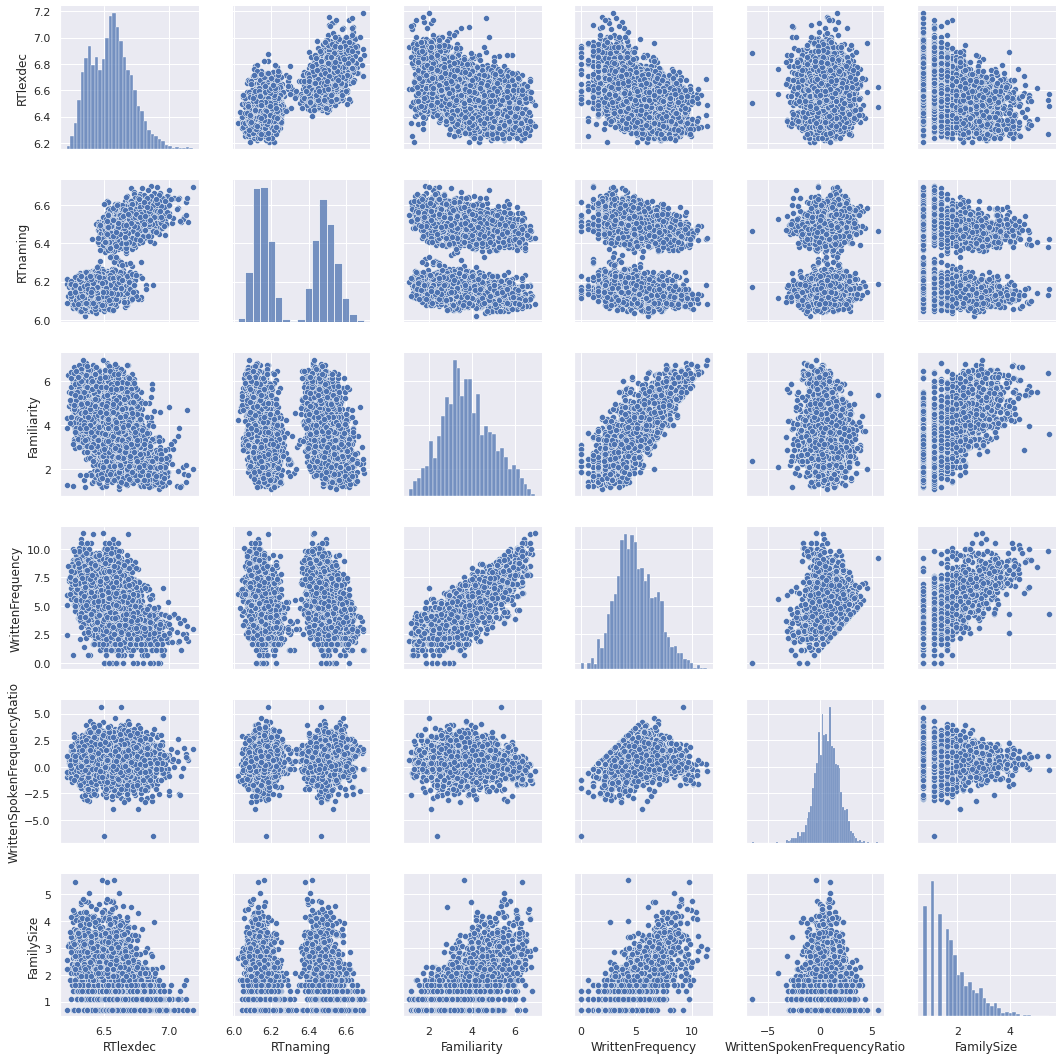

In [4]:
import seaborn as sns; sns.set()
sns.pairplot(english)

Let's focus on the subset of the data from young participants.

In [5]:
# Problem 3: Write an expression that selects the subset of rows which correspond to the young speakers.
english_young = english[english['AgeSubject'] == 'young']
english_young.head()

,RTlexdec,RTnaming,Familiarity,Word,AgeSubject,WordCategory,WrittenFrequency,WrittenSpokenFrequencyRatio,FamilySize
0,6.543754,6.145044,2.37,doe,young,N,3.912023,1.021651,1.386294
1,6.304942,6.143756,5.60,stress,young,N,6.505784,2.089356,1.609438
2,6.424221,6.131878,3.87,pork,young,N,5.017280,-0.526334,1.945910
3,6.450597,6.198479,3.93,plug,young,N,4.890349,-1.044545,2.197225
4,6.531970,6.167726,3.27,prop,young,N,4.770685,0.924801,1.386294


Let's examine the relationship between the written frequency of a word on it's 
lexical decision time. Use  [`seaborn.regplot`](https://seaborn.pydata.org/generated/seaborn.regplot.html) to make a plot with a linear trend line that 
has the fequency on the $x$-axis and lexical decision time on the $y$-axis.

You may also find this page useful in understanding how to use Seaborne to plot regression lines: https://seaborn.pydata.org/tutorial/regression.html


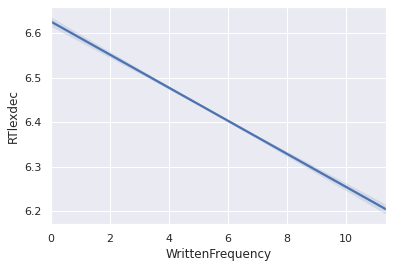

In [6]:
#Problem 4: use seaborne.regplot to plot the data with a best fit regressions line.
import numpy as np
import matplotlib.pyplot as plt
sns.regplot(x="WrittenFrequency", y="RTlexdec", scatter=False, data=english_young)

In order to examine wether or the relationship between two variables is really linear, it is useful to look at a *locally-smoothed regression line* that relates the $x$ and $y$ axes of a plot. This is a kind of regression model where the function is refit localy for many subsets of the data then a smooth line is interpolated between these points. One standard technique for this is known as *locally weighted scatterplot smoothing* or [LOWESS](https://en.wikipedia.org/wiki/Local_regression) and is implemented as an option for the line drawn by the `regplot` function. Using this examine whether the relationship between frequency and lexical decision times really looks linear.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


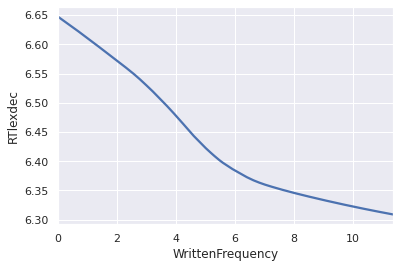

In [7]:
#Problem 5: use seaborne.regplot to mnake a plot with the best fit LOWESS line.
sns.regplot(x="WrittenFrequency", y="RTlexdec", lowess=True, scatter=False, data=english_young);

***Question 5***: What do you see in this data when you look at the two plots above? Do you think that a linear model represents the relationship between written frequency and reaction times? It may be useful  to turn on an off the plotting of the underlying data points with the `scatter=False` argument to the functions.

**Q5: put your answer here**

---
From our prediction, reaction times and written frequency are negatively correlated features. I think the linear model actually represents the relationship between them since the the first plot above perfectly show this linear relationship.

---

Let's try looking at some more complex models of the relationship between frequency and lexical decision time. Here is some starter code similar to those that we looked at in class for writing a polynomial regression. Complete the code as indicated.


Model class: Linear Regression
	Degree 1
		Train R^2: 0.4162589709751776
		Test R^2: 0.394515808566202


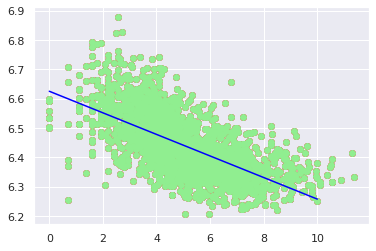

	Degree 2
		Train R^2: 0.43413669925290427
		Test R^2: 0.4162508501716485


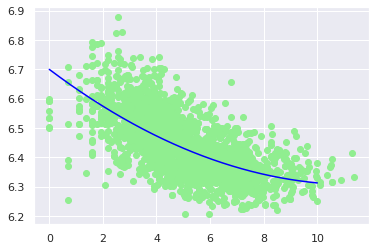

	Degree 3
		Train R^2: 0.4515467331950148
		Test R^2: 0.4292924957232266


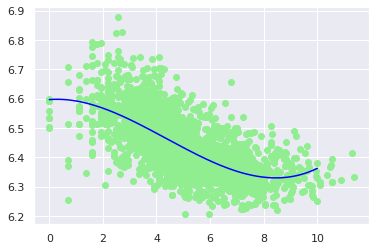

	Degree 4
		Train R^2: 0.4605133462193955
		Test R^2: 0.43554505950803657


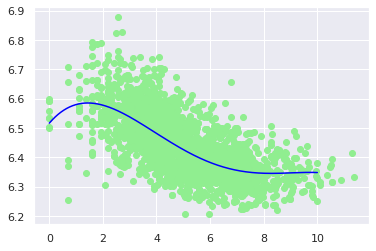

	Degree 5
		Train R^2: 0.46053802149633927
		Test R^2: 0.43529634405278894


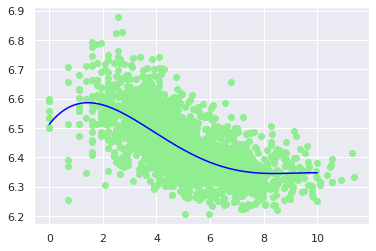

	Degree 6
		Train R^2: 0.46170878493469414
		Test R^2: 0.4365934964169861


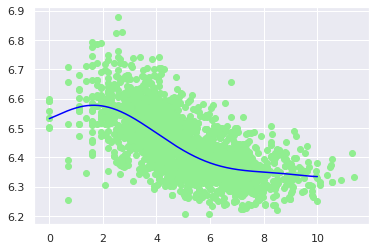

	Degree 7
		Train R^2: 0.46211355041354374
		Test R^2: 0.4340560937553095


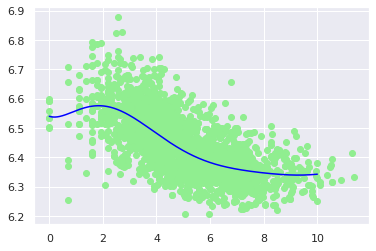

	Degree 20
		Train R^2: 0.45514334217987057
		Test R^2: 0.4225409119398854


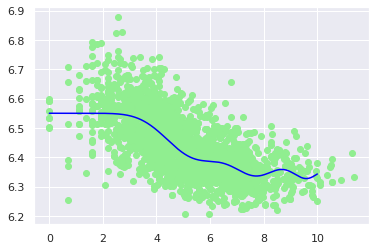

	Degree 25
		Train R^2: 0.3334159495625627
		Test R^2: 0.3148443707141415


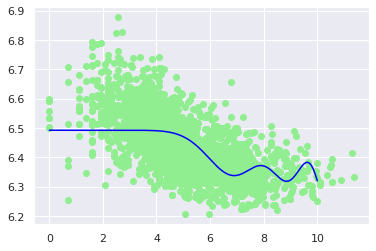

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
# Problem 6: Set up variable X (For features) and y from the input data.
X = english_young['WrittenFrequency'].values
y = english_young['RTlexdec'].values
# Problem 7: split this into test and train subsets, with 10% of the data in test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train,X_test,y_train,y_test = X_train.reshape(-1, 1),X_test.reshape(-1, 1),y_train.reshape(-1, 1),y_test.reshape(-1, 1)


X_plot = np.linspace(0, 10,5000).reshape(-1, 1)
plt.scatter(X_train, y_train, color='red')

print("Model class: " + "Linear Regression")
for degree in [1,2,3,4,5,6,7,20,25]:
  # Problem 8: fit a polynomial regression model of each degree above
  model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
  model.fit(X_train, y_train)
  
  print("\tDegree " + str(degree) +"\n\t\tTrain R^2: "+ str(model.score(X_train,y_train)))
  print("\t\tTest R^2: "+ str(model.score(X_test,y_test)))  

  # Problem 9: use plt.plot to add a line to the plot for this model using the X_plot points.
  plt.scatter(X_train, y_train, color='lightgreen')
  plt.plot(X_plot, model.predict(X_plot), color='blue')
  plt.show()

***Question 6:*** Which degree polynomial provided the best fit to this dataset? What does this say about the relationship between frequency and lexical decision times?

**Q6: put your answer here (please keep it brief, 2-4 sentences)**

---

The result shows that the polynomial of degree 5 is the best fit one. Therefore, frequency and lexical decision times may have a 5th degree polynomial relationship since it is the best fit.

---

	Lasso regression with degree 1
		Train R^2: 0.0
		Test R^2: -0.0012396176999101005


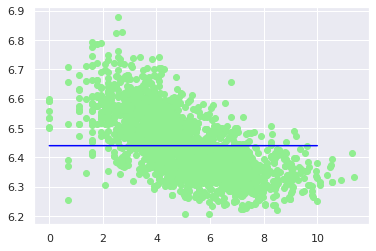

	Ridge regression with degree 1
		Train R^2: 0.41625896263270146
		Test R^2: 0.394506300013407


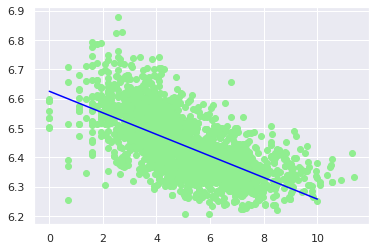

	Lasso regression with degree 2
		Train R^2: 0.1384558366528139
		Test R^2: 0.11462283048586208


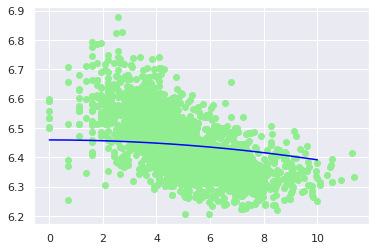

	Ridge regression with degree 2
		Train R^2: 0.4341361550103169
		Test R^2: 0.416191001989981


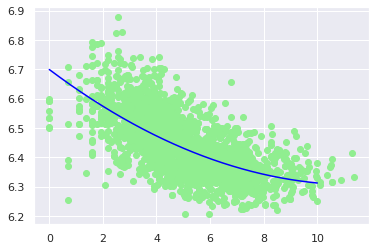

	Lasso regression with degree 3
		Train R^2: 0.2765069502487636
		Test R^2: 0.2471660284100532


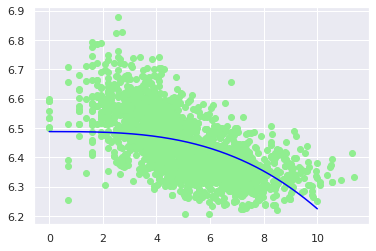

	Ridge regression with degree 3
		Train R^2: 0.45154666423854756
		Test R^2: 0.4292938476028172


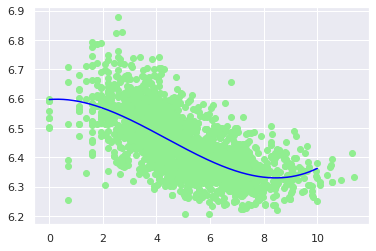

	Lasso regression with degree 4
		Train R^2: 0.3187489007194445
		Test R^2: 0.2827314121916227


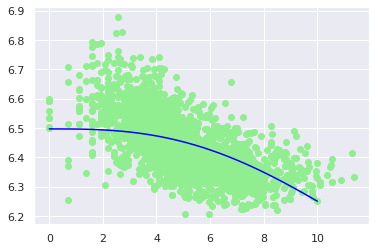

	Ridge regression with degree 4
		Train R^2: 0.46047604328428465
		Test R^2: 0.4354074640029211


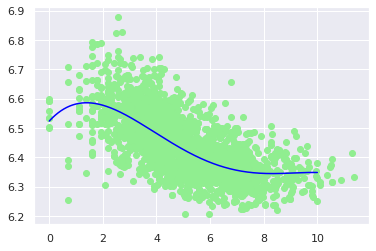

	Lasso regression with degree 5
		Train R^2: 0.3797401139895904
		Test R^2: 0.3485308342624619


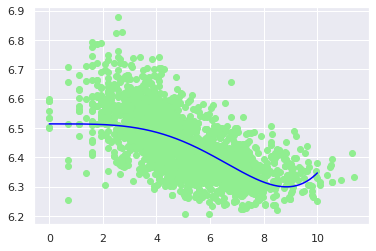

	Ridge regression with degree 5
		Train R^2: 0.460437096301344
		Test R^2: 0.43556875708829734


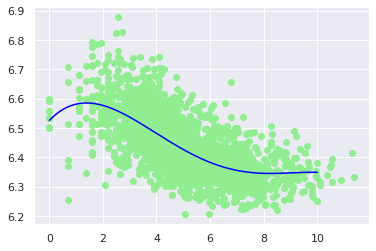

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9193063015296188, tolerance: 0.0022931244328513543
  positive)


	Lasso regression with degree 6
		Train R^2: 0.37627440960155945
		Test R^2: 0.3443741117324792


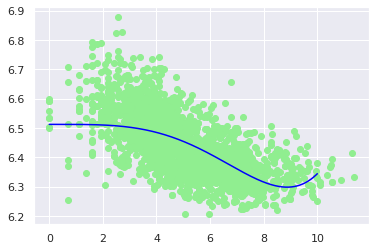

	Ridge regression with degree 6
		Train R^2: 0.461704058036217
		Test R^2: 0.4366823460907146


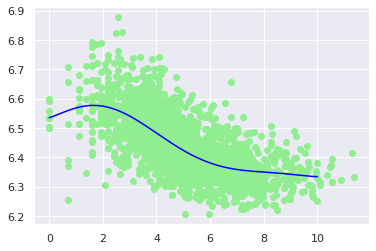

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.8266366140506785, tolerance: 0.0022931244328513543
  positive)


	Lasso regression with degree 7
		Train R^2: 0.4123254358478005
		Test R^2: 0.3780293342046286


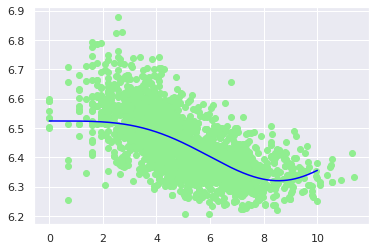

	Ridge regression with degree 7
		Train R^2: 0.46201470782194193
		Test R^2: 0.43516818277207325


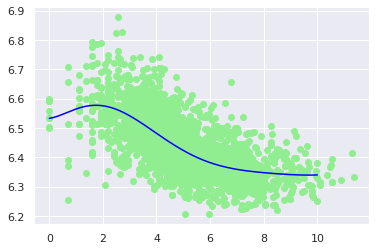

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.038025395427624, tolerance: 0.0022931244328513543
  positive)


	Lasso regression with degree 20
		Train R^2: 0.4317606549690477
		Test R^2: 0.40336823641702946


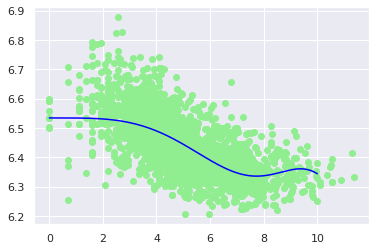

	Ridge regression with degree 20
		Train R^2: -4.465598411787459
		Test R^2: 0.029656724692207703


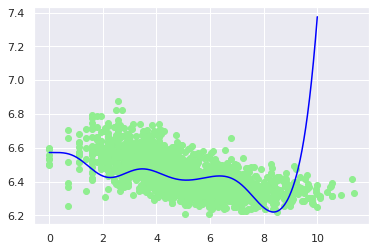

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.0367692008331675, tolerance: 0.0022931244328513543
  positive)


	Lasso regression with degree 25
		Train R^2: 0.4299326977664887
		Test R^2: 0.40057543696462944


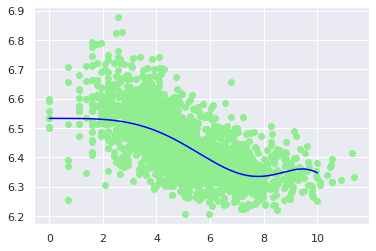

	Ridge regression with degree 25
		Train R^2: 0.3933898619177544
		Test R^2: 0.39836550023649037


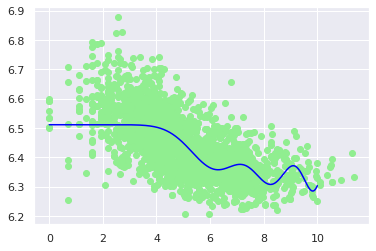

In [9]:
# Problem 10: Repeat the above analyses using Lasso and Ridge regression.
from sklearn import linear_model
from sklearn.pipeline import Pipeline
for degree in [1,2,3,4,5,6,7,20,25]:
  model_lasso = Pipeline([('poly',PolynomialFeatures(degree = degree)),('model',linear_model.Lasso())])
  model_lasso.fit(X_train, y_train)
  print("\tLasso regression with degree " + str(degree) +"\n\t\tTrain R^2: "+ str(model_lasso.score(X_train,y_train)))
  print("\t\tTest R^2: "+ str(model_lasso.score(X_test,y_test)))  
  plt.scatter(X_train, y_train, color='lightgreen')
  plt.plot(X_plot, model_lasso.predict(X_plot), color='blue')
  plt.show()
  model_ridge = Pipeline([('poly',PolynomialFeatures(degree = degree)),('model',linear_model.Ridge())])
  model_ridge.fit(X_train, y_train)
  print("\tRidge regression with degree " + str(degree) +"\n\t\tTrain R^2: "+ str(model_ridge.score(X_train,y_train)))
  print("\t\tTest R^2: "+ str(model_ridge.score(X_test,y_test))) 
  plt.scatter(X_train, y_train, color='lightgreen')
  plt.plot(X_plot, model_ridge.predict(X_plot), color='blue')
  plt.show()

***Question 7:*** What did you find using these regularization techniques? How were they similar or different to each other and the results above? Why?

**Q7: put your answer here (please keep it brief, 4-6 sentences)**

---

I found that using these regularization techniques may lead to worse performance than without using these regularization techniques. Among these models, ridge regression with degree 7 achieve the best result. 

In general, Ridge behaves better than Lasso when degree is low; On the other hand, Lasso behaves better than Ridge when degrees are high. 

The reason might be that Lasso push the weight towards 0 and then it reduce the number of features by reducing the feature importance while ridge forces the weights to be small but does not make them zero.

---

Now we will look at aniother dataset available [here](https://drive.google.com/file/d/1eaQSqiJFyrsDprmsKzZ0ysxBUmyBzVGX/view?usp=sharing).

This dataset is about morphological *regularity*&mdash;the property of whether words marke certain information like tense using regular endings (e.g., *walk*/*walked*) or irregular processes (e.g., *sing*/*sang*). The dataset consists of a Dutch verbs and is described in the following paper.


Tabak, W. M., Schreuder, R., and Baayen, R. H. (2005). [Lexical statistics and lexical processing: Semantic density, information complexity, sex, and irregularity in Dutch.](https://drive.google.com/file/d/1WRqjc7MwbCiSgOXESszBfxclnxQgAhu5/view?usp=sharing) In Kesper, S. and Reis, M., editors, Linguistic Evidence — Empirical, Theoretical, and Computational Perspectives, pages 529–555. Mouton de Gruyter, Berlin, Germany.



In [10]:
#Problemm 11: Read in the regularity dataset and familiarize yourself with it.
regularity = pd.read_csv('/content/drive/My Drive/regularity.csv')
print(regularity.info())
regularity.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           700 non-null    int64  
 1   Verb                 700 non-null    object 
 2   WrittenFrequency     700 non-null    float64
 3   FamilySize           700 non-null    float64
 4   LengthInLetters      700 non-null    int64  
 5   VerbalSynsets        700 non-null    int64  
 6   MeanBigramFrequency  700 non-null    float64
 7   NcountStem           700 non-null    int64  
 8   Regularity           700 non-null    object 
 9   InflectionalEntropy  700 non-null    float64
 10  Auxiliary            700 non-null    object 
 11  Valency              700 non-null    int64  
 12  NVratio              700 non-null    float64
 13  WrittenSpokenRatio   700 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory usage: 76.7+ KB
None


,Unnamed: 0,Verb,WrittenFrequency,FamilySize,LengthInLetters,VerbalSynsets,MeanBigramFrequency,NcountStem,Regularity,InflectionalEntropy,Auxiliary,Valency,NVratio,WrittenSpokenRatio
0,1,stelen,1.609438,2.564949,5,1,14.47,9,regular,1.00000,hebben,3,4.366913,-2.302585
1,2,tollen,5.411646,2.397895,3,1,13.61,26,regular,2.48640,zijnheb,3,-0.078927,-2.351375
2,3,blijken,9.883183,1.791759,5,1,13.84,6,irregular,2.00458,zijn,4,-3.192341,-1.526056
3,4,gloeien,6.908755,2.079442,5,3,12.95,4,regular,2.56009,hebben,5,-6.908755,1.791759
4,5,kakken,3.784190,2.079442,3,1,13.48,24,regular,1.99257,hebben,2,-0.526093,-1.386294


Figure 1 in the paper displays the correlations between various factors (features) and predictability. 

***Question 8***: Briefly describe what each of the 5 factors  excluding  inflectional entropy, log argument structures, and log N-count means and what relationship it shows to regularity.

**Q8: put your answer here. no more than 1-2 sentences per factors.**

---

`Log Lemma Frequency`:The log value of the summed frequencies of all inflectional variants. From Figure 1, the irregular tend to be more frequent.

`Log Family Size`: The log value of the number of complex words in which the verb stem occurs as a constituent. From Figure 1, regulars tend to have more small and large and less intermediate family size.

`Auxiliary`:The auxiliary selected
by the verb for the present perfect. From Figure 1, the auxiliary *zijn* was underrepresneted for the regulars; and regulars favored *zijnheb*.

`Noun−Verb Frequency Ratio`: The ratio of the noun frequency to the verb freuency. From Figure 1, regulars tend to have higher noun frequency.

`Spoken−Written Frequency Ratio`: the ratio of the verb’s frequency in spoken and
written Dutch. From Figure 1, Regulars tend to have higher spoken-written frequency ratio

---


In this section, we will focus on the relationship between `FamilySize` and `Regularity`. Unlike in the last dataset, regularity is not a continuous value, but rather a binary variable. Thus we will need to use a classification model to examine it.

For this pupose, we will use logistic regression.

[0.7619047619047619, 0.7285714285714285]

Text(0, 0.5, 'Pr(Regularity)')

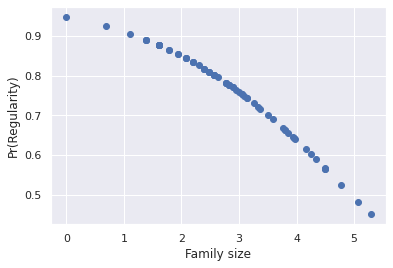

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

#Problem 12: set up X as FamilySize, y as Regularity in 
#preparation to use them to fit a logistic regression model.
encoder = preprocessing.LabelEncoder()

X = regularity['FamilySize'].values.reshape(-1, 1)
regularity['Regularity'] = encoder.fit_transform(regularity['Regularity'])
y = regularity['Regularity'].values.reshape(-1, 1).ravel()


#Problem 13: split X, and y into train and test with 10% test split. And also create
# and X_plot variable for plotting.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

#Problem 14: fit a logistic regression model on this data
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)


display([accuracy_score(y_train, lr_model.predict(X_train)),accuracy_score(y_test, lr_model.predict(X_test))])

#Problem 15: using plt.plot make a scatter plot of the data along with the predicted 
# probability of regularity as a function of family size. you will find the "predict_proba" function helpful.
prob = lr_model.predict_proba(X_test)[:,1]
plt.scatter(X_test, prob)
plt.xlabel('Family size')
plt.ylabel('Pr(Regularity)')


***Question 9***: What do you see in the fit to the logistic regression? How does the probability of being regular vary with morphological family size?

**Q9: put your answer here. no more than 2-4 sentences.**

---

The fit to the logistic regression has good accuracy (around 77%). It seems that high regularity probability has small family size, low regularity probability has large family size.

---

***Question 10***: What does the relationship on Figure 1 of the paper look like? Does this match your analysis above?

**Q10: put your answer here. no more than 2-4 sentences.**

---

From Figure 1, high regularity probability have more small and large but less intermediate family size. It matches my analysis when family size is small but it does not match my analysis when family size is large.

---

In class, we saw an example of a regression problem in which the curve was best fit by a polynomial. We can, of course, use polynomial relationships in a classification model as well. Let's take a similar approach to the analysis that we just did, except first transforming our input features polynomially.

Model class: Logistic Regression
	Degree 1
		Train R^2: 0.7603174603174603
		Test R^2: 0.7571428571428571


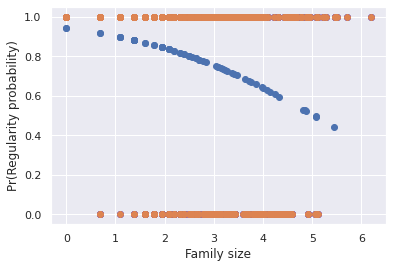

	Degree 2
		Train R^2: 0.7698412698412699
		Test R^2: 0.8


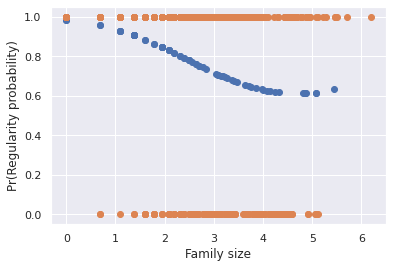

	Degree 3
		Train R^2: 0.7698412698412699
		Test R^2: 0.8


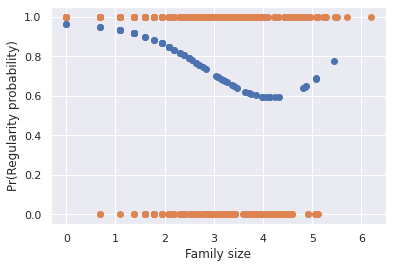

	Degree 4
		Train R^2: 0.7698412698412699
		Test R^2: 0.8


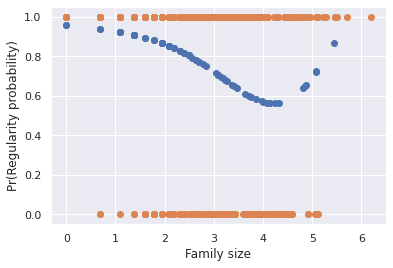

	Degree 5
		Train R^2: 0.7698412698412699
		Test R^2: 0.8


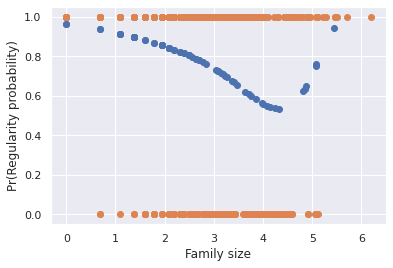

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
import scipy

#Problem 16: Set up X, y, test and train as above.
encoder = preprocessing.LabelEncoder()

X = regularity['FamilySize'].values.reshape(-1, 1)
regularity['Regularity'] = encoder.fit_transform(regularity['Regularity'])
y = regularity['Regularity'].values.reshape(-1, 1).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

#Problem 17: Plot the data points using plt.scatter.
plt.scatter(X_train, y_train, color = 'blue')

print("Model class: " + "Logistic Regression")
for degree in [1,2,3,4,5]:

  #Problem 18: set up a logistic regression model with polynomial features of degree and train it.
  lr_model = Pipeline([('poly',PolynomialFeatures(degree = degree)),('model',LogisticRegression(max_iter=1000))])
  lr_model.fit(X_train, y_train)
  
  print("\tDegree " + str(degree) +"\n\t\tTrain R^2: "+ str(accuracy_score(y_train, lr_model.predict(X_train))))
  print("\t\tTest R^2: "+ str(accuracy_score(y_test, lr_model.predict(X_test))))

  #Problem 19: Plot the resulting predicted probability line on the plot.
  prob = lr_model.predict_proba(X_test)[:,1]
  plt.scatter(X_test, prob)
  plt.xlabel('Family size')
  plt.ylabel('Pr(Regularity probability)')
  plt.scatter(X_train, y_train)
  plt.show()

***Question 11***: What do you see in the fit of these polynomial features? What is the relationship in plain English between the family size variable and the probability of being regular?

**Q11: put your answer here. no more than 2-4 sentences.**

---

Polynomial regressions of degree 2-5 give the same accuracy score, which is better than polynomial regression of degree 1 and logistic regression. 

The results of polynomial regressions with degree of 2-5 are generally matching the one from Figure 1 of the paper, low regularity probability tend to have the intermediate family size while high regularity probability tend to have smaller or larger familiy size.

---

***Question 12***: Speculate as to why this relationship might hold theoretically?

**Q12: put your answer here. no more than 2-4 sentences.**

---




---